In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import random

In [2]:
def draw_bin_image(image_matrix):
    for row in image_matrix.tolist():
        print('| ' + ' '.join(' *'[val] for val in row))

In [3]:
# 6,5 matrices
zero = np.array([
    [0,1,1,1,0],
    [1,1,0,0,1],
    [1,1,0,0,1],
    [1,1,0,0,1],
    [1,1,0,0,1],
    [0,1,1,1,0],
])

one = np.array([
    [0,0,0,1,0],
    [0,0,1,1,0],
    [0,1,1,1,0],
    [0,0,1,1,0],
    [0,0,1,1,0],
    [0,1,1,1,1]
])

two = np.array([
    [0,1,1,1,0],
    [1,0,0,0,1],
    [0,0,0,1,0],
    [0,1,1,0,0],
    [1,1,0,0,0],
    [1,1,1,1,1]
])

In [4]:
matrices = [zero, one, two]
for matr in matrices:
    draw_bin_image(matr)

|   * * *  
| * *     *
| * *     *
| * *     *
| * *     *
|   * * *  
|       *  
|     * *  
|   * * *  
|     * *  
|     * *  
|   * * * *
|   * * *  
| *       *
|       *  
|   * *    
| * *      
| * * * * *


Alternative way to draw, with matplotib.

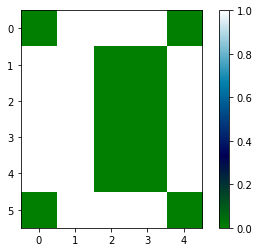

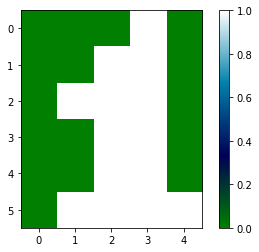

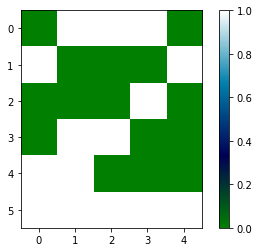

In [5]:
for matr in matrices:
    plt.imshow(matr, interpolation='nearest', cmap=plt.cm.ocean)
    plt.colorbar()
    plt.show()

In [6]:
def create_weight_matrix(data):
    # initialize some values
    m = data[0].shape[0] # 6
    n = data[0].shape[1] # 5
    N = len(data)
    weight = np.zeros((m*n,m*n), int) # initialize
    
    # construct the weights matrix by dot prodct for each data matrix and sum them up
    for matrix in data:
        # first replace all 0's with -1
        matrix[matrix==0] = -1
        # mat2vec
        vec = np.concatenate(matrix)
        vec = vec.reshape(m*n,1)
        # sum up the wegiths for all data matrices
        weight += vec.dot(vec.T)       
    
    # normalize weight and replace diagonal values with 0
    weight = 1/N * weight
    for i in range(m*n):
        weight[i,i] = 0
    
    return weight,m, n

In [7]:
def update(s, weights, time_=10000, mode='synchronous'):
    
    m = s.shape[0] # 6
    n = s.shape[1] # 5
    s = np.concatenate(s) # 30,
    s = s.reshape(m*n,1) # 30,1 
    s[s==0] = -1
    new_s = np.ones((m*n,1)) # 30,1
    
    if mode == 'synchronous':
        for time in range(time_):
            s = np.sign(weights.dot(s))# 30,30 dot 30,1 -> 30,1
        return s
    
    elif mode == 'asynchronous':
        for time in range(time_):
            i = np.random.randint(0,m*n) # choose a number from 0..m*n-1
            s[i] = np.sign(weights[i][:].dot(s)) # 1,30 dot 30,1 -> 1,1
        return s

In [8]:
def HopfieldNetwork(s, data):
    
    w, m, n = create_weight_matrix(data)
    new_s = update(s, w)
    new_s = new_s.reshape((m,n))
    
    plt.imshow(new_s, interpolation='nearest', cmap=plt.cm.ocean)
    plt.colorbar()
    plt.show()
    
    return new_s
    

My input 
- data to train my net (shapes of 0,1,2), 
- and the shape i will check to see if my it reminds me anything i've seen. 

In [9]:
# data
data = [zero,one,two]

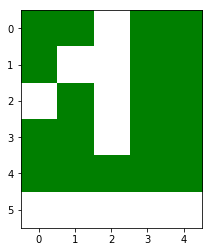

In [12]:
# shape ; is this a memory? 
s = np.array([
    [0,0,1,0,0],
    [0,1,1,0,0],
    [1,0,1,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
    [1,1,1,1,1]
])
plt.imshow(s, interpolation='nearest', cmap=plt.cm.ocean)
plt.show()

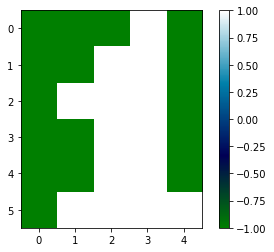

array([[-1., -1., -1.,  1., -1.],
       [-1., -1.,  1.,  1., -1.],
       [-1.,  1.,  1.,  1., -1.],
       [-1., -1.,  1.,  1., -1.],
       [-1., -1.,  1.,  1., -1.],
       [-1.,  1.,  1.,  1.,  1.]])

In [11]:
# <is this?> the answer!
HopfieldNetwork(s, data)